<a href="https://colab.research.google.com/github/rohanthk/Computer-Vision/blob/main/Traffic_Sign_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [2]:
! kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

100% 609M/612M [00:16<00:00, 43.0MB/s]
100% 612M/612M [00:16<00:00, 38.5MB/s]


In [3]:
! unzip /content/gtsrb-german-traffic-sign.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/5/00005_00053_00010.png  
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_00000.png  
  in

In [35]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os

import cv2
from PIL import Image

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

**Loading Dataset**

In [36]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

for i in range(classes):
    path = os.path.join('/content/','Train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

data = np.array(data)
labels = np.array(labels)

**Data Splitting and Conversion**

In [37]:
print(data.shape, labels.shape)

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)


print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


**Building the Model**

In [38]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        2432      
                                                                 
 conv2d_9 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 11, 11, 32)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 11, 11, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 9, 9, 64)          18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 7, 7, 64)          36928     
                                                      

**Training the Model**

In [39]:
with tf.device('/GPU:0'):
    epochs = 15
    history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/15
981/981 [==============================] - 10s 8ms/step - loss: 2.2927 - accuracy: 0.3967 - val_loss: 1.0869 - val_accuracy: 0.7276
Epoch 2/15
981/981 [==============================] - 8s 8ms/step - loss: 1.1245 - accuracy: 0.6692 - val_loss: 0.4690 - val_accuracy: 0.8894
Epoch 3/15
981/981 [==============================] - 7s 7ms/step - loss: 0.8086 - accuracy: 0.7549 - val_loss: 0.3572 - val_accuracy: 0.8945
Epoch 4/15
981/981 [==============================] - 8s 8ms/step - loss: 0.7007 - accuracy: 0.7882 - val_loss: 0.2869 - val_accuracy: 0.9176
Epoch 5/15
981/981 [==============================] - 7s 7ms/step - loss: 0.6206 - accuracy: 0.8134 - val_loss: 0.2396 - val_accuracy: 0.9306
Epoch 6/15
981/981 [==============================] - 9s 9ms/step - loss: 0.5896 - accuracy: 0.8238 - val_loss: 0.2981 - val_accuracy: 0.9126
Epoch 7/15
981/981 [==============================] - 8s 8ms/step - loss: 0.5608 - accuracy: 0.8315 - val_loss: 0.2213 - val_accuracy: 0.9355
Epoch

**Visualizing the performance of the Model**

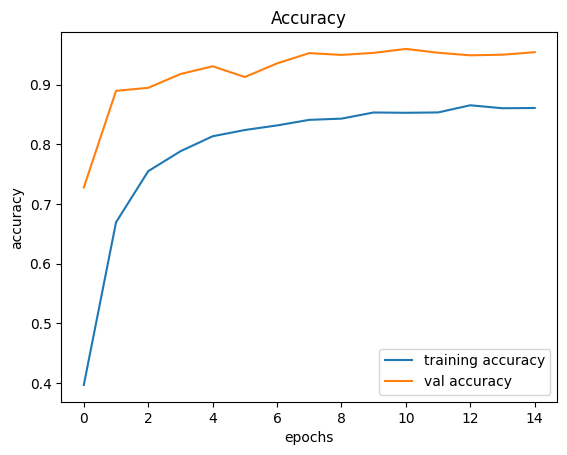

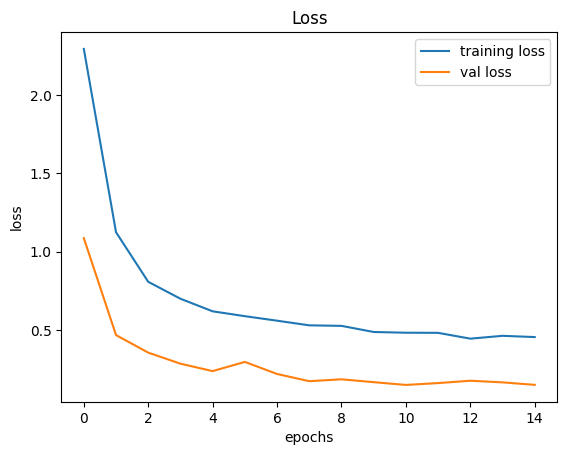

In [40]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

**Loading Test Dataset and Evaluating the model**

In [41]:
from sklearn.metrics import accuracy_score

y_test = pd.read_csv('/content/Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

with tf.device('/GPU:0'):
    for img in imgs:
        image = Image.open('/content/'+img)
        image = image.resize([30, 30])
        data.append(np.array(image))

X_test=np.array(data)

with tf.device('/GPU:0'):
    pred = np.argmax(model.predict(X_test), axis=-1)

from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))


395/395 [==============================] - 1s 2ms/step
0.9068883610451306


**Saving the model**

In [42]:
model.save('traffic_sign_classifier.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Load the Model**

In [43]:
os.chdir(r'/content/')
model = load_model('/content/traffic_sign_classifier.h5')

In [44]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            11:'Right-of-way at intersection',
            12:'Priority road',
            13:'Yield',
            14:'Stop',
            15:'No vehicles',
            16:'Veh > 3.5 tons prohibited',
            17:'No entry',
            18:'General caution',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Bumpy road',
            23:'Slippery road',
            24:'Road narrows on the right',
            25:'Road work',
            26:'Traffic signals',
            27:'Pedestrians',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End speed + passing limits',
            33:'Turn right ahead',
            34:'Turn left ahead',
            35:'Ahead only',
            36:'Go straight or right',
            37:'Go straight or left',
            38:'Keep right',
            39:'Keep left',
            40:'Roundabout mandatory',
            41:'End of no passing',
            42:'End no passing veh > 3.5 tons' }

In [45]:
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = np.argmax(model.predict(X_test))
    return image,Y_pred

1/1 [==============================] - 0s 82ms/step
Predicted traffic sign is:  Turn right ahead


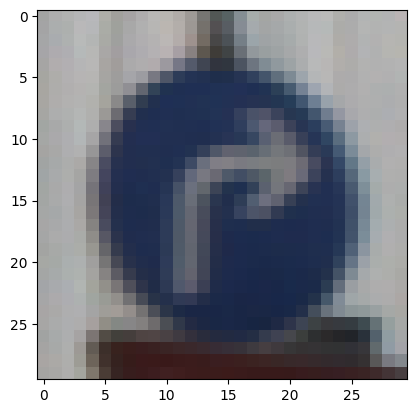

In [46]:
plot,prediction = test_on_img(r'/content/Test/00099.png')
print("Predicted traffic sign is: ", classes[prediction])
plt.imshow(plot)
plt.show()